In [1]:
import cv2
import sys
sys.path.append("../")
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from multiprocessing import Pool
import torch
import os

from data.kitti_semantic import Kitti360Semantic, Kitti360Semantic1Hot

In [6]:
dataset = Kitti360Semantic(data_dir="/media/namrata/Data/data/kitti-360/data_2d_semantics/train", sample_size=None, crop_size=512)

In [3]:
len(dataset)

61390

In [ ]:
for i in range(10):
    mask = dataset[np.random.randint(len(dataset))]['mask'].permute(1, 2, 0)
    plt.subplot(121)
    plt.imshow(mask)
    img = mask.numpy()
    img = cv2.resize(img, (1408, 376), interpolation=cv2.INTER_AREA)
    plt.subplot(122)
    plt.imshow(img)
    plt.show()

In [2]:
crop_size = 512
dataset = Kitti360Semantic1Hot(data_dir="../../Datasets/Kitti360/data_2d_semantics/train", sample_size=None, crop_size=crop_size)
len(dataset)

61390

data address is =../../Datasets/Kitti360/data_2d_semantics/train\2013_05_28_drive_0002_sync\semantic\0000004666.png


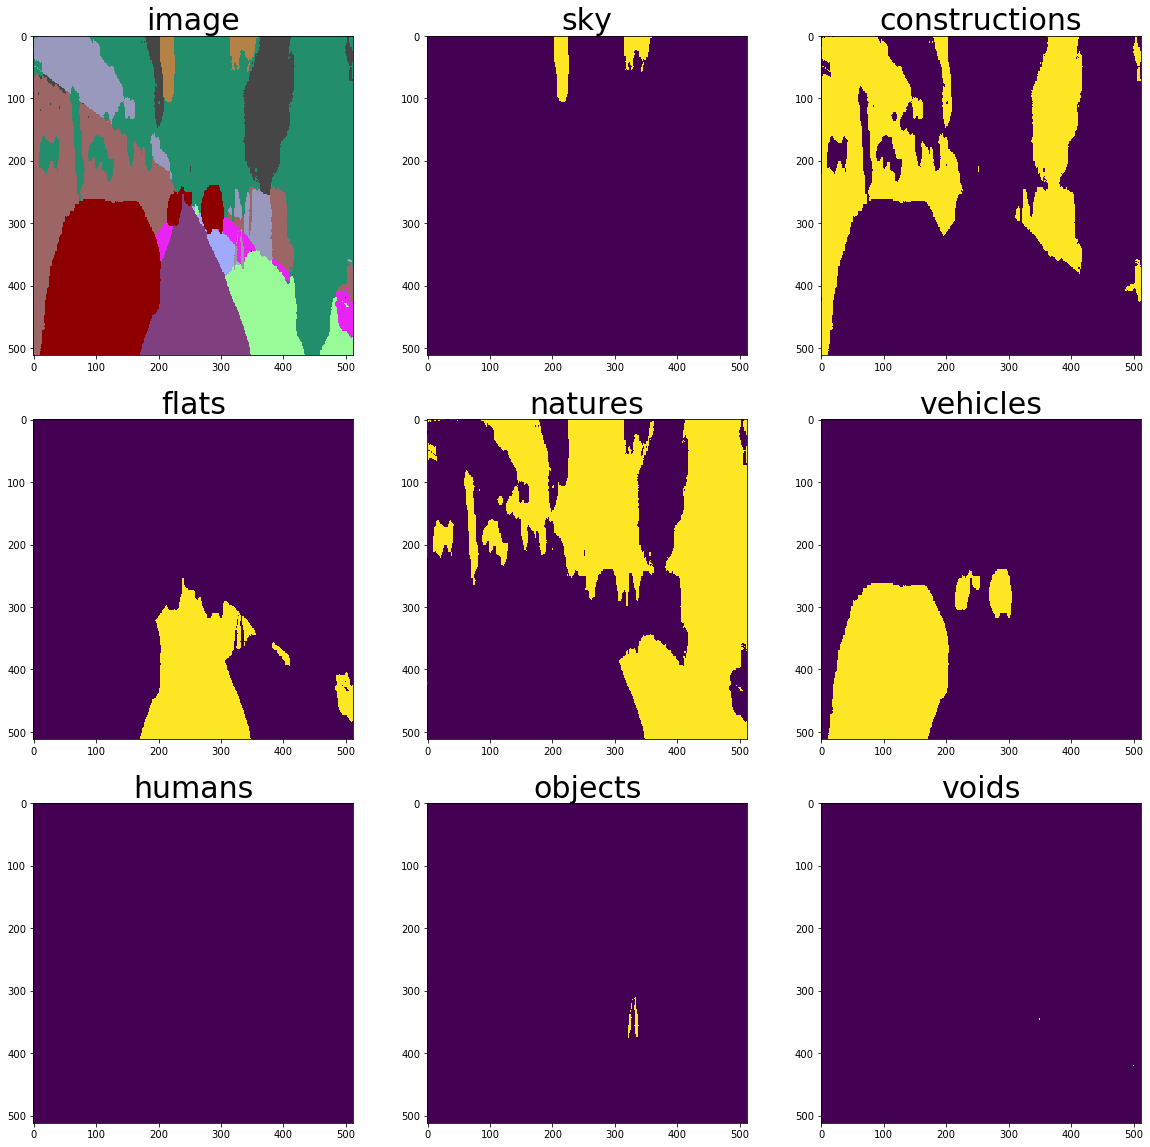

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20 ,20

image_classified = dataset[np.random.randint(len(dataset))]
print('data address is ={}'.format(image_classified['addr']))

plt.subplot(331)
image = cv2.imread(os.path.dirname(image_classified['addr']) + '_rgb/' + os.path.basename(image_classified['addr']))
image = cv2.resize(image, (crop_size, crop_size), interpolation=cv2.INTER_NEAREST)
plt.imshow(image)
plt.title('image', fontsize=30)

plt.subplot(332)
plt.imshow(torch.squeeze(image_classified['sky']))
plt.title('sky', fontsize=30)

plt.subplot(333)
plt.imshow(torch.squeeze(image_classified['constructions']))
plt.title('constructions', fontsize=30)

plt.subplot(334)
plt.imshow(torch.squeeze(image_classified['flats']))
plt.title('flats', fontsize=30)

plt.subplot(335)
plt.imshow(torch.squeeze(image_classified['natures']))
plt.title('natures', fontsize=30)

plt.subplot(336)
plt.imshow(torch.squeeze(image_classified['vehicles']))
plt.title('vehicles', fontsize=30)

plt.subplot(337)
plt.imshow(torch.squeeze(image_classified['humans']))
plt.title('humans', fontsize=30)

plt.subplot(338)
plt.imshow(torch.squeeze(image_classified['objects']))
plt.title('objects', fontsize=30)

plt.subplot(339)
plt.imshow(torch.squeeze(image_classified['voids']))
plt.title('voids', fontsize=30)
plt.show()